# Import all Required Lib

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Load the datasets


In [18]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("tested.csv")


In [19]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
test_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Fill missing values in 'Age', 'Embarked', and 'Fare' columns


In [21]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())


In [24]:
test_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Drop irrelevant columns


In [25]:
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
test_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)


In [26]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Encode categorical variables


In [27]:
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"], drop_first=True)


In [28]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


# Align train and test data (ensure they have the same columns)


In [29]:
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the models


In [30]:

models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=200)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Train and evaluate models


In [31]:
results = {}
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the features
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    
  

# Cross-validation score


In [32]:
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Predict on the validation set
    y_pred_val = pipeline.predict(X_val)
    

# Calculate evaluation metrics


In [33]:
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)
    roc_auc_val = roc_auc_score(y_val, y_pred_val)
    
  

 # Confusion matrix
# Store results in the dictionary



In [34]:
    cm = confusion_matrix(y_val, y_pred_val)
    
    results[name] = {
        "Model": name,
        "CV Accuracy": cv_score,
        "Validation Accuracy": accuracy_val,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1-score": f1_val,
        "ROC-AUC": roc_auc_val,
        "Confusion Matrix": cm
    }

# Convert the results dictionary to a DataFrame


In [35]:
results_df = pd.DataFrame(results).T

# Visualize results


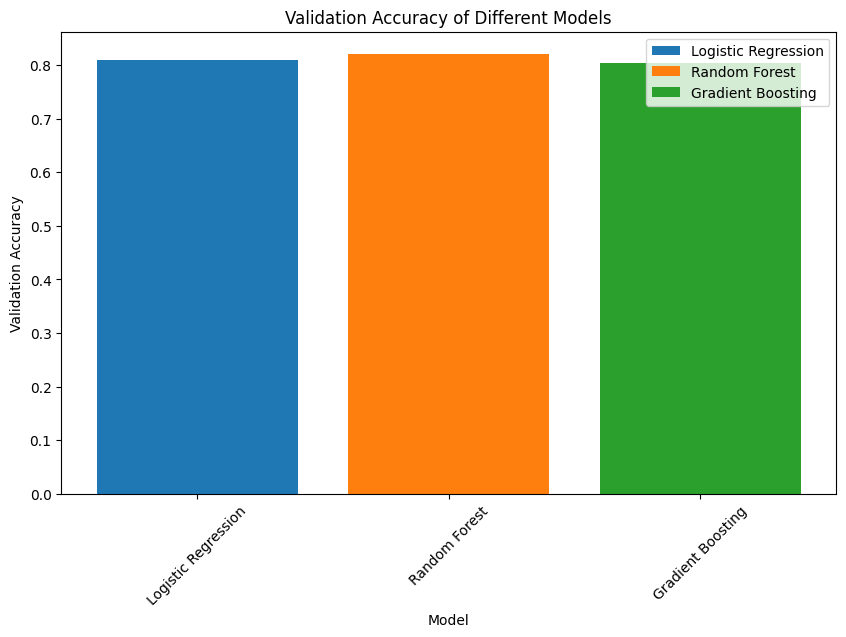

In [36]:
# Visualize results for all models
plt.figure(figsize=(10, 6))
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the features
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)

    # Predict on the validation set
    y_pred_val = pipeline.predict(X_val)
    
    # Calculate accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    
    # Plot the accuracy
    plt.bar(name, accuracy_val, label=name)

plt.title('Validation Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Results

In [37]:
# Initialize an empty dictionary to store results for all models
results = {}

# Train and evaluate models
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the features
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred_val = pipeline.predict(X_val)
    
    # Calculate evaluation metrics
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)
    roc_auc_val = roc_auc_score(y_val, y_pred_val)
    
    # Store results in the dictionary
    results[name] = {
        "Accuracy": accuracy_val,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1-score": f1_val,
        "ROC-AUC": roc_auc_val
    }

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results).T

# Print the results DataFrame
print(results_df)


                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.810056   0.785714  0.743243  0.763889  0.800193
Random Forest        0.821229   0.800000  0.756757  0.777778  0.811712
Gradient Boosting    0.804469   0.819672  0.675676  0.740741  0.785457
